<a href="https://colab.research.google.com/github/Srujith20/Glomeruli-Binary-Classifier/blob/main/TransferLearningBinaryClassifier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

#Mounting Drive

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data Processing

##Creating Train, Validate and Test Folders

In [4]:
#Create a directory for train, validate and test sets from original data
import os
import shutil
#Original Data Dource
original_dataset_dir = '/content/drive/MyDrive/Sampled_Binary_Data'

#Directory with train,test and validation sets created from original
#Each folder has folders corresponding to classes with images
base_dir = '/content/drive/MyDrive/transfer learning'
os.mkdir(base_dir) #make base directory


#Create train, validate, test set directories

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_sclerotic = os.path.join(train_dir, 'sclerotic')
os.mkdir(train_sclerotic)

train_non_sclerotic = os.path.join(train_dir, 'non_sclerotic')
os.mkdir(train_non_sclerotic)

validation_sclerotic = os.path.join(validation_dir, 'sclerotic')
os.mkdir(validation_sclerotic)

validation_non_sclerotic = os.path.join(validation_dir, 'non_sclerotic')
os.mkdir(validation_non_sclerotic)

test_sclerotic = os.path.join(test_dir, 'sclerotic')
os.mkdir(test_sclerotic)

test_non_sclerotic = os.path.join(test_dir, 'non_sclerotic')
os.mkdir(test_non_sclerotic)

##Populating Train, Validate and Test into 70%, 15% and 15% of original respectively

###Splitting of Sclerotic Images

In [5]:
# Giving path for Sclerotic Images in Original Data
original_sclerotic_data_dir = '/content/drive/MyDrive/Sampled_Binary_Data/sclerotic'

all_files = os.listdir(original_sclerotic_data_dir)
num_file = len(all_files)

# Define the split ratios (e.g., 70% train, 15% test, 15% validate)
train_ratio = 0.7
test_ratio = 0.15
validate_ratio = 0.15

# Calculate the number of files for each split
num_files = int(num_file)
num_train = int(train_ratio * num_files)
num_test = int(test_ratio * num_files)
num_validate = num_files - num_train - num_test

# Copy files to train directory
train_files = all_files[:num_train]
for file in train_files:
    src = os.path.join(original_sclerotic_data_dir, file)
    dst = os.path.join(train_sclerotic, file)
    shutil.copy(src, dst)

# Copy files to test directory
test_files = all_files[num_train:num_train + num_test]
for file in test_files:
    src = os.path.join(original_sclerotic_data_dir, file)
    dst = os.path.join(test_sclerotic, file)
    shutil.copy(src, dst)

# Copy files to validate directory
validate_files = all_files[num_train + num_test:]
for file in validate_files:
    src = os.path.join(original_sclerotic_data_dir, file)
    dst = os.path.join(validation_sclerotic, file)
    shutil.copy(src, dst)

###Splitting of Non-Sclerotic Images

In [6]:
# Giving path for Sclerotic Images in Original Data
original_non_sclerotic_data_dir = '/content/drive/MyDrive/Sampled_Binary_Data/non_sclerotic'

all_files_non= os.listdir(original_non_sclerotic_data_dir)
num_file_non = len(all_files_non)

# Define the split ratios (e.g., 70% train, 15% test, 15% validate)
train_ratio = 0.7
test_ratio = 0.15
validate_ratio = 0.15

# Calculate the number of files for each split
num_files_non = int(num_file_non)
num_train_non = int(train_ratio * num_files_non)
num_test_non = int(test_ratio * num_files_non)
num_validate_non = num_files_non - num_train_non - num_test_non

# Copy files to train directory
train_files_non = all_files_non[:num_train_non]
for file in train_files_non:
    src = os.path.join(original_non_sclerotic_data_dir, file)
    dst = os.path.join(train_non_sclerotic, file)
    shutil.copy(src, dst)

# Copy files to test directory
test_files_non = all_files_non[num_train_non:num_train_non + num_test_non]
for file in test_files_non:
    src = os.path.join(original_non_sclerotic_data_dir, file)
    dst = os.path.join(test_non_sclerotic, file)
    shutil.copy(src, dst)

# Copy files to validate directory
validate_files_non = all_files_non[num_train_non + num_test_non:]
for file in validate_files_non:
    src = os.path.join(original_non_sclerotic_data_dir, file)
    dst = os.path.join(validation_non_sclerotic, file)
    shutil.copy(src, dst)

###Declaring Batach and Image Size

In [7]:
BATCH_SIZE = 10
IMG_SIZE = (160, 160)

###Creating Training, Validation and Test Datasets

In [11]:
import tensorflow as tf


In [16]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                           shuffle=True,
                                                           batch_size=BATCH_SIZE,
                                                           image_size=IMG_SIZE)

Found 210 files belonging to 2 classes.
Found 46 files belonging to 2 classes.
Found 44 files belonging to 2 classes.


In [14]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

###Check the images in the dataset

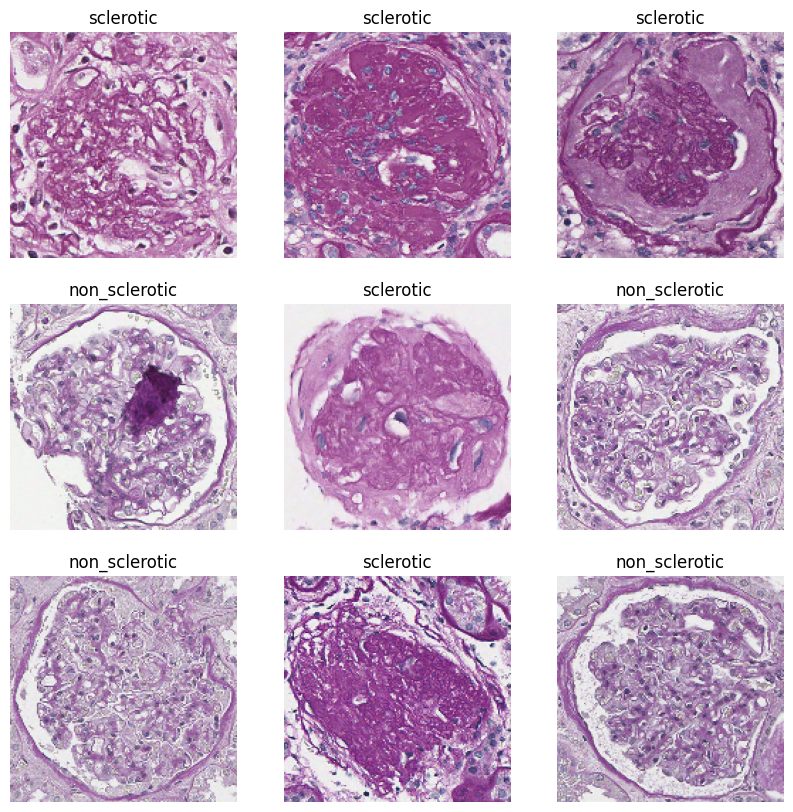

In [15]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

##Dataset Configuration for Performance

In [17]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

##Data Augmentation

In [18]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

####Testing Augemtation on an Image

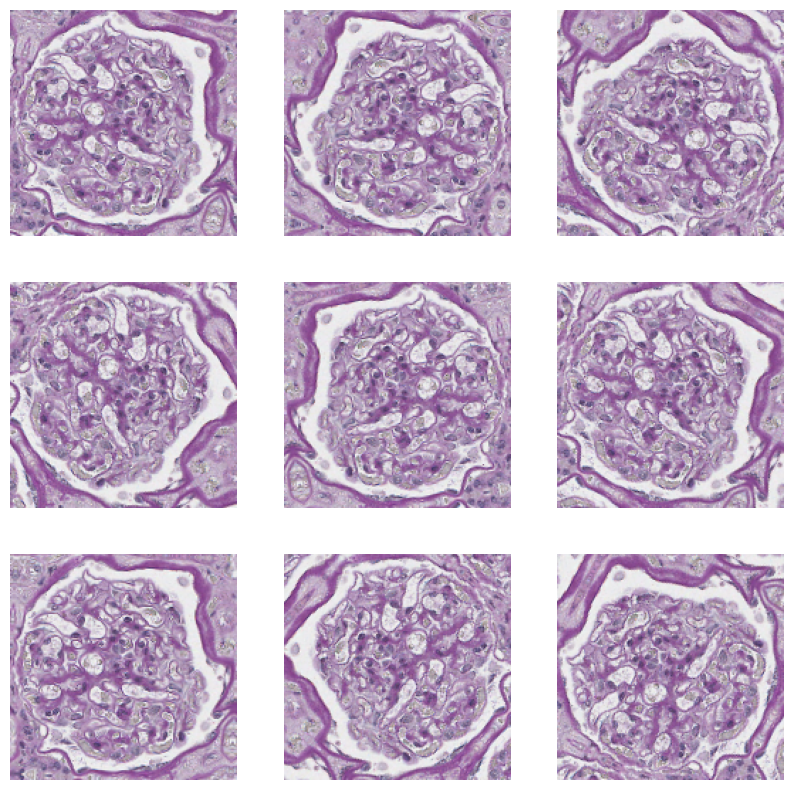

In [19]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

##Rescale Pixel Values to fit the model

In [20]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

# Create the Model

In [21]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [25]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(10, 5, 5, 1280)


#Feature Extraction

##Freeze the Convolutional Base

In [22]:
base_model.trainable = False

##Model Summary

In [ ]:
# Let's take a look at the base model architecture
base_model.summary()

## Add a classification head

In [26]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(10, 1280)


In [27]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(10, 1)


##Chaining data augmentation, rescaling, base_model and feature extractor layers using the Keras Functional API

In [28]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [30]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 160, 160, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 160, 160, 3)       0         
 da)                                                             
                                                                 
 mobilenetv2_1.00_160 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                             

In [29]:
len(model.trainable_variables)

2

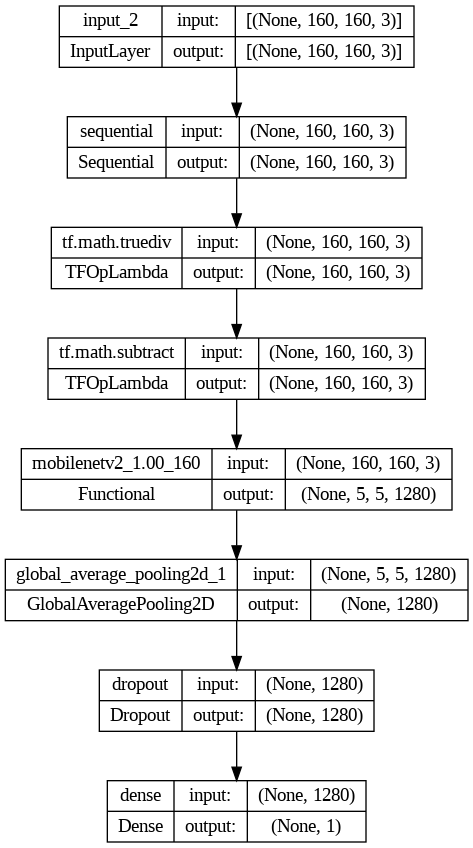

In [31]:
tf.keras.utils.plot_model(model, show_shapes=True)